In [1]:
#!pip install opencv-python

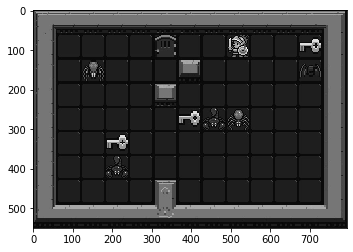

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/Users/friends/Downloads/Exam/"

CATEGORIES = ["zeldaPlayablelevels", "zeldaUnplayablelevels"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

RGB data is 3 times the greyscale data. so we use greyscale data 

In [3]:
#This is what our data looks like, nmbers which are pixel values
print(img_array)

[[ 39  38  38 ...  39  38 170]
 [ 40  34  40 ...  40  37 170]
 [ 37  40  35 ...  36  39 170]
 ...
 [ 40  38  39 ...  38  37 170]
 [ 38  37  37 ...  38  36 170]
 [162 163 163 ... 170 169 170]]


In [4]:
print(img_array.shape)


(550, 793)


550 tall, 793 wide, 1-channel image. if i dont use greyscale then its 3-channel because of it's RGB (color). Image size is big so resize image in next step. if various images are different shapes then it is also a problem, but the images look like they are same size in our dataset.

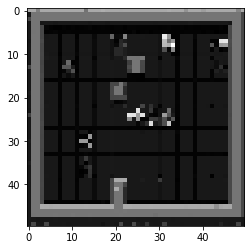

In [5]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

image size 50x50 looks blurry, 

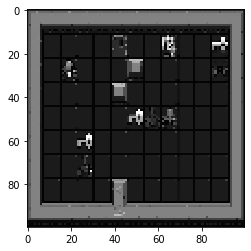

In [6]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

## Train Test split

Lets manually create a directory called "Testing" and then create 2 directories inside of there, one for zeldaPlayablelevels and one for zeldaUnplayablelevels. 

As we create training dataset, we have the features as numbers but our labels/ classification is not yet a number, we can map the label to a numerical value i-e playable as 1 and unplayable as 0 or vice-versa. It is an arbitrary classification. 

Since we have equal images for bith catagories, we dont have to worry about class imbalance. But we can shuffle the data


In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do zeldaPlayablelevels and zeldaUnplayablelevels

        path = os.path.join(DATADIR,category)  # create path to zeldaPlayablelevels and zeldaUnplayablelevels
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=zeldaPlayablelevels 1=zeldaUnplayablelevels

        for img in tqdm(os.listdir(path)):  # iterate over each image per zeldaPlayablelevels and zeldaUnplayablelevels
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 1010/1010 [00:03<00:00, 287.70it/s]

2018


In [8]:
import random

random.shuffle(training_data)
#shuffled training dataset can be seen as follows
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
1
1
0
0
0


Putting features in X and labels in y for further use

In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
#we cannot pass a list to NN, so we reshape the data
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1)) #-1 means the number we have (its any number) and 1 is because its greyscale

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

[[[[114]
   [129]
   [129]
   ...
   [132]
   [129]
   [177]]

  [[ 96]
   [ 92]
   [ 93]
   ...
   [ 99]
   [ 93]
   [ 92]]

  [[ 92]
   [103]
   [131]
   ...
   [129]
   [104]
   [ 93]]

  ...

  [[ 54]
   [ 55]
   [ 55]
   ...
   [ 55]
   [ 55]
   [ 54]]

  [[ 58]
   [ 38]
   [ 40]
   ...
   [ 49]
   [ 38]
   [ 54]]

  [[ 45]
   [ 48]
   [ 41]
   ...
   [ 44]
   [ 53]
   [ 45]]]]


## # save this data for feeding it to a neural network model

In [10]:
import pickle
#"""
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
#"""

In [11]:
#"""
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
#"""